# NLP/IMDB Movie Sentiment classification

Our goal is to build a model able to predict the sentiment of a given review (business, sport, politics, entertainment, tech)

## I. Data preprocessing :

### 1) Load the dataset


In [0]:
!pip install -q kaggle

To get your API :
go to [Kaggle.com](https://www.kaggle.com/) --> my account (top right click on the profile pic) --> scroll down to "create API token" 

In [0]:
from google.colab import files
uploaded = files.upload() #upload the .json file to the colab

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!cp kaggle.json /root/.kaggle
!kaggle datasets download -d solomon4/imdbreview

 39% 10.0M/25.7M [00:00<00:00, 37.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.6MB/s]


In [0]:
!unzip /content/imdbreview.zip

Archive:  /content/imdbreview.zip
  inflating: imdb_review.csv         


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/imdb_review.csv')

In [0]:
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [0]:
df.shape

(50000, 2)

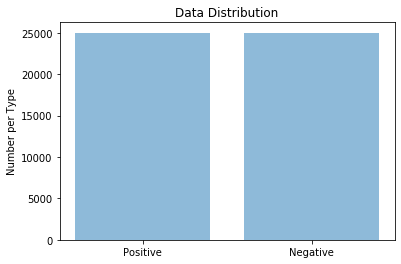

[25000, 25000]


In [0]:
objects = ('Positive', 'Negative')
y_pos = np.arange(len(objects))
performance = [len(df.loc[df.sentiment==1]),len(df.loc[df.sentiment==0])]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number per Type')
plt.title('Data Distribution')
 
plt.show()
print(performance)

In [0]:
dfLabel = df[:500]
dfUnlabel = df[500:49000].drop(['sentiment'], axis = 1)

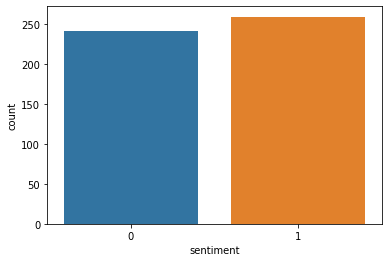

In [0]:
sns.countplot(data = dfLabel,x = 'sentiment')

### Import Libraries

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize as wt
from nltk.tokenize import punkt
from nltk.stem import PorterStemmer
from collections import defaultdict
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [0]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stopwords.append('film')
stopwords.append('movie')
stopwords.append('br')
stopwords.append('even')
stopwords.append('one')
stopwords.append('make')
stopwords.append('show')

#### Lowcase

In [0]:
df.review = df.review.apply(str.lower)

### 2) Remove stop words


In [0]:
def StopwordRm(text):
    filtred_text=''
    for word in text.split():
        if word not in stopwords:
            filtred_text = filtred_text + word+ ' '
    return filtred_text

In [0]:
df.review = df.review.apply(StopwordRm)

In [0]:
df.head()

,review,sentiment
0,family normally watch local movies simple reas...,1
1,"believe not, time worst ever seen. since time,...",0
2,"internet surfing, found ""homefront"" series dvd...",0
3,unheralded great works animation. though makes...,1
4,"sixties, anyone long hair hip, distant attitud...",0


### 3) Remove  indesired ponctuation 


In [0]:
import string
punkt = list(string.punctuation)

In [0]:
def PunctRm(text):
    filtred_text = ''
    for x in text:
      if x not in punkt:
            filtred_text = filtred_text + x
    return filtred_text

In [0]:
df.review = df.review.apply(PunctRm)

In [0]:
df.head()

,review,sentiment
0,family normally watch local movies simple reas...,1
1,believe not time worst ever seen since time se...,0
2,internet surfing found homefront series dvd io...,0
3,unheralded great works animation though makes ...,1
4,sixties anyone long hair hip distant attitude ...,0


### 4) Words lemmatization


In [0]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
def Lemmetizer(text):
  filtred_text = ''
  for word in text.split():
          filtred_text = filtred_text + lemmatizer.lemmatize(word, get_wordnet_pos(word)) + ' '
  return filtred_text

In [0]:
df.review = df.review.apply(Lemmetizer)

In [0]:
df.head()

,review,sentiment
0,family normally watch local movie simple reaso...,1
1,believe not time bad ever see since time see m...,0
2,internet surf found homefront series dvd ioffe...,0
3,unheralded great work animation though make so...,1
4,sixty anyone long hair hip distant attitude co...,0


### WordCloud

In [0]:
pos_review=""
neg_review=""
for index,row in df.iterrows():
    if(row["sentiment"]==1):
        pos_review=pos_review+" "+row["review"]
    else:
        neg_review=neg_review+" "+row["review"]

In [0]:
wordcloud_pos=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(pos_review)
wordcloud_neg=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(neg_review)

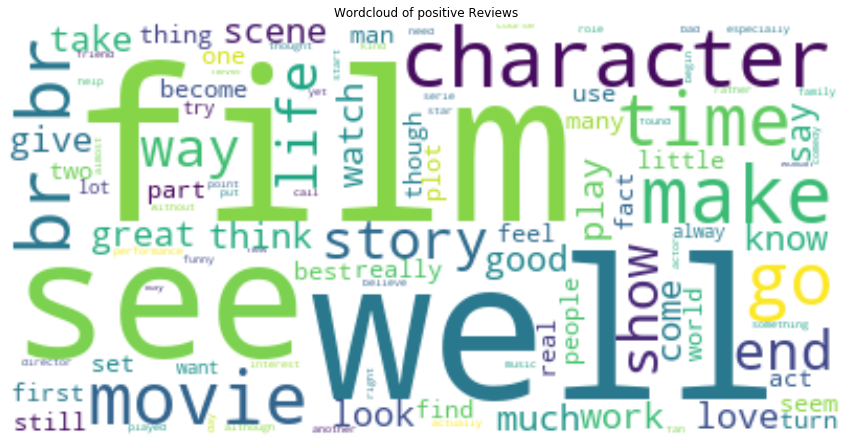

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of positive Reviews")
plt.show()

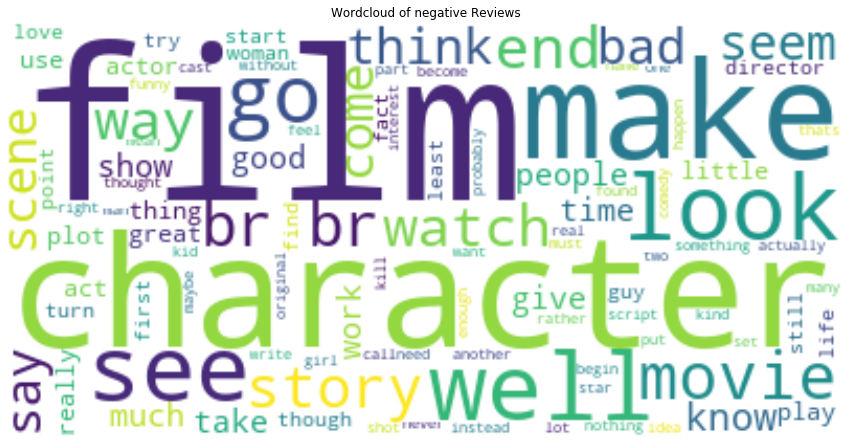

In [0]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of negative Reviews")
plt.show()

In [0]:
samples = []
dfLabel = df[:500]
for i in range(90):
  samples.append(df[i*500:(i+1)*500])

## Preparing train and test data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size = 0.2,random_state=42)

# ML Approach :

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

### We use CountVectorizer
provided by SKlearn to get our document-term matrix (n_samples,n_features) 

In [0]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(dfLabel.review, dfLabel.sentiment)

In [0]:
predicted = text_clf.predict(samples[0].review)

In [0]:
pd.concat([predicted ,samples[0].sentiment])

In [0]:
Train = np.concatenate(dfLabel.review,samples[0].review)

In [0]:
for sample in samples :
  predicted = text_clf.predict_proba(x_test) 
  x_train, x_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size = 0.2,random_state=42)
  x_train = dfTrain + sample
  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform(x_train)
  text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
  text_clf = text_clf.fit(x_train, y_train)
  y_train = np.concatenate(y_train, pred)

### TF_IDF
 reduce the weightage of more common words like (the, is, an etc.) which occur in all document. This is called as TF-IDF i.e Term Frequency times inverse document frequency.
Wiki : TF_IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

In [0]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(8000, 56619)

### Pipeline allows us to automate some of the code we may repeat like fitting and our model

In [0]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(x_train, y_train)

In [0]:
predicted = text_clf.predict_proba(x_test)[::,1]

In [0]:
print("Accuracy = ",np.mean(y_test==np.round(predicted)))

Accuracy =  0.8475


### DL Approach

### 5) One-hot encoding


In [0]:
onehot_encoder = OneHotEncoder(sparse=False)

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.sentiment)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


### 6) Split the dataset for training and testing


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.review, onehot_encoded, test_size = 0.2,random_state=42)

### 7) Words vectorization

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
tokenizer = Tokenizer(num_words=25000)

In [0]:
tokenizer.fit_on_texts(x_train.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 56807 unique tokens.


In [0]:
X_Train = tokenizer.texts_to_sequences(x_train.values)
X_Train = pad_sequences(X_Train, maxlen=500)
print('Shape of data:', X_Train.shape)

Shape of data: (8000, 500)


## II. Model training 


### - Create a neural network architecture (LSTM) and use it to train the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, SpatialDropout1D,LSTM
from keras.layers import Embedding
from keras import metrics

In [0]:
model = Sequential()
model.add(Embedding(25000, 100, input_length=X_Train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          2500000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 500, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 2,580,602
Trainable params: 2,580,602
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
hist = model.fit(X_Train,y_train,batch_size=128,epochs=3,verbose=1,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6400 samples, validate on 1600 samples
Epoch 1/3





6400/6400 [==============================] - 52s 8ms/step - loss: 0.6223 - acc: 0.6530 - val_loss: 0.4888 - val_acc: 0.7812
Epoch 2/3
6400/6400 [==============================] - 50s 8ms/step - loss: 0.3100 - acc: 0.8795 - val_loss: 0.3641 - val_acc: 0.8413
Epoch 3/3
6400/6400 [==============================] - 49s 8ms/step - loss: 0.1486 - acc: 0.9478 - val_loss: 0.4339 - val_acc: 0.8462


In [0]:
X_Test = tokenizer.texts_to_sequences(x_test.values)
X_Test = pad_sequences(X_Test, maxlen=500)
print('Shape of data:', X_Test.shape)

Shape of data: (2000, 500)


In [0]:
preds = model.predict_classes(X_Test)

In [0]:
Y_Test = (onehot_encoder.inverse_transform(y_test))

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(Y_Test, preds)

0.8385